# Data Preprocessing

In [1]:
train_dataset = './dataset/train.csv'
test_dataset = './dataset/test.csv'

In [2]:
import pandas as pd

In [3]:
import pandas as pd
train_data = pd.read_csv(train_dataset, encoding='ISO-8859-1')
test_data = pd.read_csv(test_dataset,encoding="ISO-8859-1")
data = pd.concat([train_data,test_data])

In [4]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
final_corpus = data['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = data["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
import string
import re
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
data_eda['text'] = data_eda["text"].apply(wp)

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\rk225\AppData\Local\Temp\ipykernel_17276\4244050370.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\rk225\AppData\Local\Temp\ipykernel_17276\4244050370.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [9]:
data_eda

,text,sentiment
0,Id have responded if I were going,neutral
1,Sooo SAD I will miss you here in San Diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,Sons of why couldnt they put them on the rel...,negative
...,...,...
27475,wish we could come see u on Denver husband l...,negative
27476,Ive wondered about rake to The client has ma...,negative
27477,Yay good for both of you Enjoy the break you...,positive
27478,But it was worth it,positive


In [10]:
data_eda.to_csv("data_eda.csv", index=False)

In [11]:
data_eda['sentiment_code'] = data_eda['sentiment'].astype('category').cat.codes

## Feature Extraction

In [12]:
X=data_eda['text']
y= data_eda['sentiment_code']

## Word To Token

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [14]:
tokenizer.fit_on_texts(X)

In [15]:
input_sequences = []
for sentence in X:
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    input_sequences.append(tokenized_sentence)

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LENGTH = max([len(x) for x in input_sequences])
print(MAX_LENGTH)

32


In [17]:
enocoder_input = pad_sequences(input_sequences, maxlen=MAX_LENGTH, padding='pre')

# Model Building

In [18]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

In [19]:
input = Input(shape=(MAX_LENGTH,))
x = Embedding(len(tokenizer.word_index)+1, 10)(input)
x = LSTM(64)(x)
output = Dense(3, activation='softmax')(x)

model = Model(input, output)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 32, 10)         │       265,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284,765 (1.09 MB)

 Trainable params: 284,765 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [22]:
history = model.fit(enocoder_input, y, epochs=10)

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5083 - loss: 0.9630
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7574 - loss: 0.5931
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8282 - loss: 0.4523
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8759 - loss: 0.3468
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9038 - loss: 0.2824
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9201 - loss: 0.2399
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9347 - loss: 0.2013
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9405 - loss: 0.1851
Epoch 9/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9466 - loss: 0.1658
Epoch 10/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9512 - loss: 0.1477


# Predicting

In [23]:
def SentimentAnalysis(text):
    sentece = [text]
    tokenized_sentence = tokenizer.texts_to_sequences(sentece)
    input_sequence = pad_sequences(tokenized_sentence, maxlen=MAX_LENGTH, padding='pre')
    prediction_ = model.predict(input_sequence)
    print(prediction_)
    prediction = prediction_.argmax()
    print(prediction)
    if prediction == 0:
        print(f"Negative 😠: [confidence - {prediction_[0][0]*100:.2f}%]")
    elif prediction == 1:
        print(f"Neutral 😐: [confidence - {prediction_[0][1]*100:.2f}%]")
    else:
        print(f"Positive 😊: [confidence -  {prediction_[0][2]*100:.2f}%]")
    plot = pd.DataFrame(prediction_, columns=['Negative', 'Neutral', 'Positive'])
    plot.plot(kind='barh')
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
[[0.0163009  0.00561282 0.9780863 ]]
2
Positive 😊: [confidence -  97.81%]


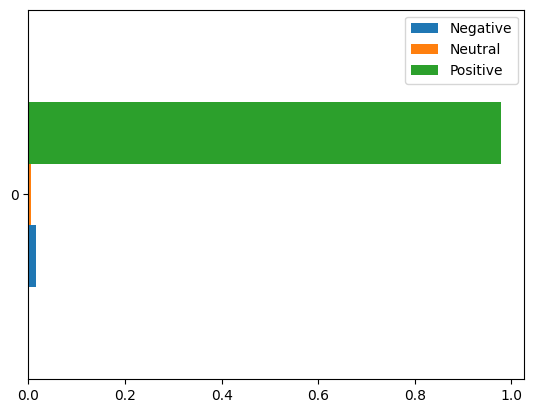

In [24]:
SentimentAnalysis("I am happy")